<h1><center>«Portfolio-Exam Part II» </center></h1>
<h2><center>MADS-ML </center></h2>
<h3><center>Author: Tom Wüsten </center></h3>

### Abstract
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 
	 <br>



### Attribute Information:

Input variables:
#### bank client data:
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') <br>
5 - default: has credit in default? (categorical: 'no','yes','unknown') <br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown') <br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown') <br>
#### related with the last contact of the current campaign: 
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') <br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') <br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). <br>
Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. <br>
Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) <br>
14 - previous: number of contacts performed before this campaign and for this client (numeric) <br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') <br>
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric) <br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) <br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric) <br>
20 - nr.employed: number of employees - quarterly indicator (numeric) <br>

#### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no') <br>


### Outline
* [Data Cleansing](#1) <br>
* [Data Exploration](#2) <br>
* [Data Preparation](#3) <br>
* [Classification](#4) <br>
	* [Decision Tree](#5) <br>
	* [Random Forest](#6) <br>
	* [balanced Random Forest](#7) <br>
	* [Support Vector Machines](#8) <br>
* [Interpretation](#9) <br>

In [99]:
#Load Libaries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, tree
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, plot_confusion_matrix
import sklearn.metrics as ms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, tree
import seaborn as sns

In [74]:
# Load Data
df = pd.read_csv("bank-additional-full.csv", sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
print(df.shape)
df.drop_duplicates()
df.shape

(41188, 21)


(41188, 21)

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [68]:
distribution = df["y"].value_counts()
print(distribution)

no     36548
yes     4640
Name: y, dtype: int64


In [15]:
X = df.iloc[: , :-1]
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [75]:

lb_make = LabelEncoder()
df['y']= lb_make.fit_transform(df['y'])

In [76]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [77]:
y = df["y"]
df= df.iloc[: , :-1]
X = pd.get_dummies(df, columns=['job', 'marital', 'education','default','housing', 'loan','contact','month','day_of_week','poutcome'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)
scaler1 = preprocessing.StandardScaler().fit(X_train)
X_train_sc = scaler1.transform(X_train)
X_test_sc = scaler1.transform(X_test)

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28831 entries, 39075 to 15795
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            28831 non-null  int64  
 1   duration                       28831 non-null  int64  
 2   campaign                       28831 non-null  int64  
 3   pdays                          28831 non-null  int64  
 4   previous                       28831 non-null  int64  
 5   emp.var.rate                   28831 non-null  float64
 6   cons.price.idx                 28831 non-null  float64
 7   cons.conf.idx                  28831 non-null  float64
 8   euribor3m                      28831 non-null  float64
 9   nr.employed                    28831 non-null  float64
 10  job_admin.                     28831 non-null  uint8  
 11  job_blue-collar                28831 non-null  uint8  
 12  job_entrepreneur               28831 non-n

In [49]:
def cross_validate_setting(X,y,model, params):
    """ Form a cross validate setting.
     
    Keywords arguments:
    X       -- input data as dataframe
    y       -- target as dataframe
    model   -- classifier as estimator object
    params  -- hyperparameter as dict
    """    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
    clf = GridSearchCV(model, params, scoring='balanced_accuracy', cv=cv, n_jobs = -1)
    search = clf.fit(X,y)
    return search

In [79]:
clf = tree.DecisionTreeClassifier(criterion='gini')
max_depth_range = list(range(2,15))
hyperparameter = {"max_depth": max_depth_range}
score = cross_validate_setting(X_train_sc,y_train,clf,hyperparameter)
print(score.best_params_)
print(score.best_score_)
result = pd.DataFrame(score.cv_results_)
result.head()

{'max_depth': 3}
0.7660109715847645


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score,mean_test_score,std_test_score,rank_test_score
0,0.466593,0.115548,0.007790,0.007267,2,{'max_depth': 2},0.687734,0.695643,0.691494,0.691834,...,0.680775,0.697011,0.671443,0.685876,0.657793,0.693909,0.716866,0.689378,0.013571,13
1,0.596480,0.169923,0.007465,0.006531,3,{'max_depth': 3},0.771158,0.783574,0.750561,0.775907,...,0.743530,0.780914,0.759987,0.760548,0.748436,0.789558,0.780012,0.766011,0.012284,1
2,0.724102,0.207549,0.007261,0.002959,4,{'max_depth': 4},0.726018,0.736254,0.705460,0.720138,...,0.714426,0.730857,0.764899,0.740895,0.738499,0.757206,0.720113,0.730492,0.016758,12
3,0.834378,0.212907,0.007420,0.002548,5,{'max_depth': 5},0.734047,0.764653,0.711664,0.742969,...,0.716330,0.759255,0.738940,0.720674,0.700309,0.755107,0.762162,0.734033,0.020587,9
4,0.955096,0.253079,0.008488,0.005889,6,{'max_depth': 6},0.737701,0.752982,0.715643,0.723972,...,0.720359,0.753297,0.740164,0.760453,0.703827,0.740844,0.755668,0.731584,0.016766,11


In [83]:
clf = RandomForestClassifier()
hyperparameter = {"max_depth": [2,3,5,10], "n_estimators": [1,10,100]}
score_random_forest = cross_validate_setting(X_train_sc,y_train,clf,hyperparameter)
print(score_random_forest.best_params_)
print(score_random_forest.best_score_)
result = pd.DataFrame(score_random_forest.cv_results_)
result.head()

{'max_depth': 10, 'n_estimators': 1}


In [88]:
result = pd.DataFrame(score_random_forest.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score,mean_test_score,std_test_score,rank_test_score
0,0.151205,0.031887,0.009847,0.008093,2,1,"{'max_depth': 2, 'n_estimators': 1}",0.512435,0.504224,0.546418,...,0.587812,0.670340,0.500000,0.580630,0.578947,0.500000,0.519609,0.548007,0.046242,10
1,0.500846,0.106020,0.017443,0.006992,2,10,"{'max_depth': 2, 'n_estimators': 10}",0.532374,0.527081,0.510574,...,0.501538,0.528253,0.504615,0.510378,0.503077,0.500000,0.507106,0.517979,0.022470,11
2,4.032191,0.806421,0.086387,0.026188,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.502872,0.501538,0.519218,...,0.501538,0.503077,0.516337,0.502686,0.500000,0.525958,0.506154,0.503056,0.004432,12
3,0.181694,0.047197,0.009486,0.004863,3,1,"{'max_depth': 3, 'n_estimators': 1}",0.605303,0.603190,0.606513,...,0.650813,0.578531,0.528764,0.567371,0.527081,0.617358,0.692080,0.582557,0.047668,7
4,0.637458,0.137015,0.018052,0.005590,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.560899,0.570549,0.569376,...,0.579023,0.556311,0.525177,0.562440,0.548619,0.574968,0.602806,0.562391,0.019940,9


In [20]:
def calc_balanced_accuracy_score(model,x_train,y_train,x_test,y_test):
    """calculate the balanced accuracy of a model
    
    Keywords arguments:
    x_train -- train data as dataframe
    y_train -- train target as dataframe
    x_test  -- test data as dataframe
    y_test  -- test target as dataframe
    model   -- classifier as estimator object
    
    """
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    print(balanced_accuracy_score(y_test, y_test_pred))
    return balanced_accuracy_score(y_test, y_test_pred)

In [80]:
model = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=3)
print(calc_balanced_accuracy_score(model,X_train_sc, y_train, X_test_sc, y_test))

0.7689370845955956
0.7689370845955956


[[10424   544]
 [  573   816]]


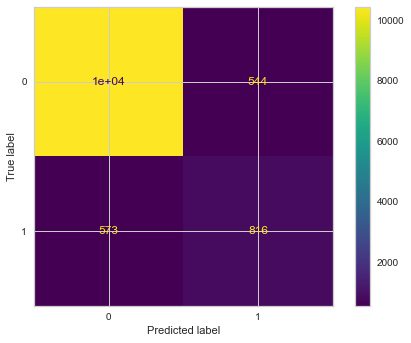

In [81]:
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=3)
clf.fit(X_train_sc, y_train)
y_test_pred = clf.predict(X_test_sc)
print(confusion_matrix(y_test, y_test_pred))
ms.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

[Text(223.2, 261.6075, 'X[9] <= -1.094\ngini = 0.2\nsamples = 28831\nvalue = [25580, 3251]'),
 Text(111.6, 186.8625, 'X[1] <= -0.355\ngini = 0.494\nsamples = 3493\nvalue = [1938, 1555]'),
 Text(55.8, 112.1175, 'X[1] <= -0.513\ngini = 0.27\nsamples = 1259\nvalue = [1056, 203]'),
 Text(27.9, 37.3725, 'gini = 0.179\nsamples = 816\nvalue = [735, 81]'),
 Text(83.69999999999999, 37.3725, 'gini = 0.399\nsamples = 443\nvalue = [321, 122]'),
 Text(167.39999999999998, 112.1175, 'X[3] <= -5.115\ngini = 0.478\nsamples = 2234\nvalue = [882, 1352]'),
 Text(139.5, 37.3725, 'gini = 0.305\nsamples = 665\nvalue = [125, 540]'),
 Text(195.29999999999998, 37.3725, 'gini = 0.499\nsamples = 1569\nvalue = [757, 812]'),
 Text(334.79999999999995, 186.8625, 'X[1] <= 1.029\ngini = 0.125\nsamples = 25338\nvalue = [23642, 1696]'),
 Text(279.0, 112.1175, 'X[7] <= -1.324\ngini = 0.051\nsamples = 22614\nvalue = [22027, 587]'),
 Text(251.1, 37.3725, 'gini = 0.292\nsamples = 1684\nvalue = [1385, 299]'),
 Text(306.9, 37.

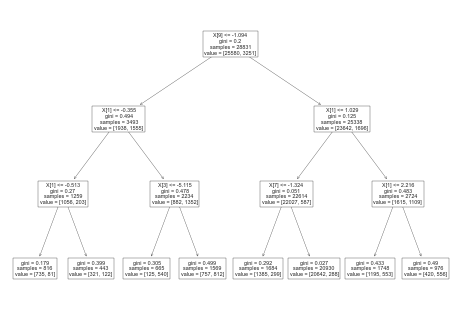

In [82]:
tree.plot_tree(clf) 

In [85]:
model = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=1)
calc_balanced_accuracy_score(model,X_train_sc, y_train, X_test_sc, y_test)

0.6797020352157386


0.6797020352157386

[[10488   480]
 [  829   560]]


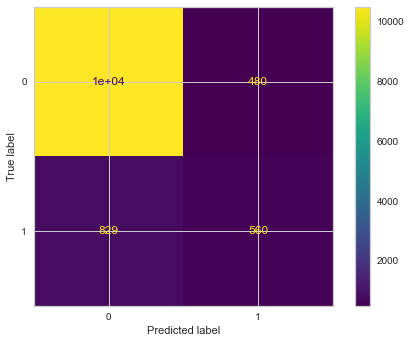

In [84]:
clf = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=1)
clf.fit(X_train_sc, y_train)
y_test_pred = clf.predict(X_test_sc)
print(confusion_matrix(y_test, y_test_pred))
rdf = y_test_pred
ms.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

In [90]:
df = pd.read_csv("bank-additional-full.csv", sep = ";")
lb_make = LabelEncoder()
df['y']= lb_make.fit_transform(df['y'])
y = df["y"]
df= df.iloc[: , :-1]
X = pd.get_dummies(df, columns=['job', 'marital', 'education','default','housing', 'loan','contact','month','day_of_week','poutcome'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y, shuffle=True)
scaler1 = preprocessing.StandardScaler().fit(X_train)
X_train_sc = scaler1.transform(X_train)
X_test_sc = scaler1.transform(X_test)

## RDF mit Stratify

In [91]:
clf = RandomForestClassifier()
hyperparameter = {"max_depth": [2,3,5,10], "n_estimators": [1,10,100]}
score_random_forest = cross_validate_setting(X_train_sc,y_train,clf,hyperparameter)
print(score_random_forest.best_params_)
print(score_random_forest.best_score_)
result = pd.DataFrame(score_random_forest.cv_results_)
result.head()

{'max_depth': 10, 'n_estimators': 1}
0.6668016598914039


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score,mean_test_score,std_test_score,rank_test_score
0,0.147784,0.031235,0.008487,0.004063,2,1,"{'max_depth': 2, 'n_estimators': 1}",0.502882,0.507325,0.500000,...,0.500000,0.506324,0.594527,0.576015,0.602263,0.500000,0.586954,0.555135,0.049780,10
1,0.503725,0.075935,0.016276,0.005826,2,10,"{'max_depth': 2, 'n_estimators': 10}",0.506154,0.500000,0.515237,...,0.500000,0.503077,0.501538,0.500000,0.507692,0.507497,0.576456,0.515244,0.022493,11
2,4.119612,0.883514,0.088039,0.035634,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.506154,0.503086,0.500000,...,0.501538,0.500000,0.500000,0.507301,0.501538,0.501538,0.500000,0.502669,0.003940,12
3,0.178155,0.045385,0.008852,0.003110,3,1,"{'max_depth': 3, 'n_estimators': 1}",0.553968,0.511369,0.573624,...,0.613915,0.615378,0.642944,0.586809,0.631009,0.701847,0.573379,0.576700,0.044905,7
4,0.648777,0.158473,0.018480,0.005187,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.536142,0.513694,0.565732,...,0.586299,0.555530,0.580145,0.561488,0.569376,0.542465,0.578777,0.557657,0.022353,9


In [94]:
ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(X_train_sc, y_train)
clf = RandomForestClassifier()
hyperparameter = {"max_depth": [2,3,5,10], "n_estimators": [1,10,100]}
score_balanced_random_forest = cross_validate_setting(X_res,y_res,clf,hyperparameter)
print(score_balanced_random_forest.best_params_)

{'max_depth': 10, 'n_estimators': 100}


In [96]:
result = pd.DataFrame(score_balanced_random_forest.cv_results_)
score_balanced_random_forest.best_score_

0.90204811025857

In [97]:
model = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=100)
calc_balanced_accuracy_score(model,X_res, y_res, X_test_sc, y_test)

0.8855571017500825


0.8855571017500825

[[8826 2139]
 [ 244 1148]]


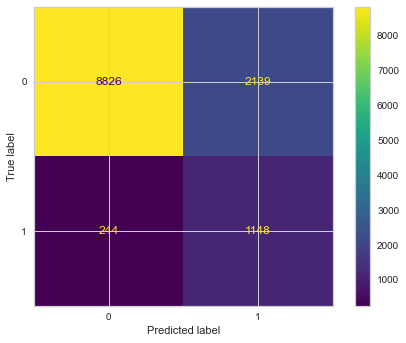

In [98]:
clf = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=1)
clf.fit(X_res, y_res)
y_test_pred = clf.predict(X_test_sc)
print(confusion_matrix(y_test, y_test_pred))
rdf = y_test_pred
ms.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)